## Mean-Volatility Modeling

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2018-01-01'
data = yf.download(
    '^GSPC',
    start = start_date,
    interval = '1d',
    progress = False
)

YF.download() has changed argument auto_adjust default to True


In [2]:
ret = data['Close'].pct_change().dropna()
ret.head()

Ticker,^GSPC
Date,
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662
2018-01-09,0.001303


### 1. AR-GARCH Model

In [3]:
import arch 
import warnings
warnings.filterwarnings('ignore')

garch_model1 = arch.arch_model(
    ret, 
    vol = 'GARCH', 
    p = 2, q = 1,
    mean = 'AR',
    lags = [1, 2]
)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 1.6243199110067108e+21
Iteration:      2,   Func. Count:     25,   Neg. LLF: 281242759.1579535
Iteration:      3,   Func. Count:     41,   Neg. LLF: 8.967044589288357e+17
Iteration:      4,   Func. Count:     59,   Neg. LLF: 3192022084.0304604
Iteration:      5,   Func. Count:     75,   Neg. LLF: 1.0857081762316052e+16
Iteration:      6,   Func. Count:     89,   Neg. LLF: 4.572458792156742e+19
Iteration:      7,   Func. Count:    104,   Neg. LLF: -5752.747081336737
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5752.747075037985
            Iterations: 11
            Function evaluations: 104
            Gradient evaluations: 7
                           AR - GARCH Model Results                           
Dep. Variable:                  ^GSPC   R-squared:                       0.029
Mean Model:                        AR   Adj. R-squared:                  0.028
Vol Model:                   

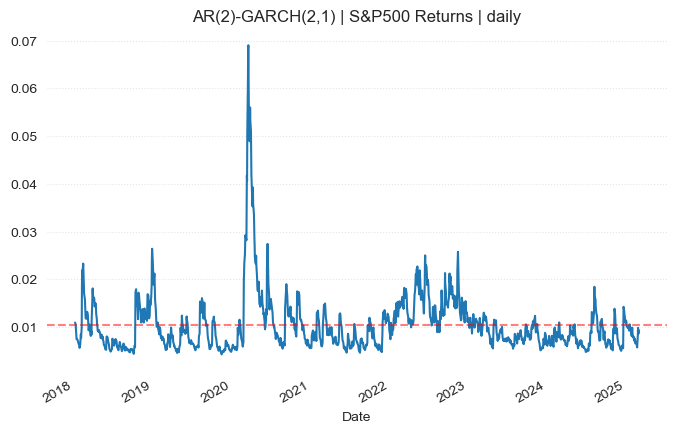

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
result1.conditional_volatility.plot(ax = ax)
plt.axhline(
    result1.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'AR(2)-GARCH(2,1) | S&P500 Returns | daily')
plt.show()

### 2. ARMA-GARCH Model

In [5]:
import statsmodels.api as sm

arma = sm.tsa.ARIMA(
    ret, 
    order = (1, 0, 1)
).fit()

In [6]:
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 1799
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5377.215
Date:                Sun, 02 Mar 2025   AIC                         -10746.430
Time:                        02:50:00   BIC                         -10724.450
Sample:                             0   HQIC                        -10738.316
                               - 1799                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.889      0.059   -1.93e-05       0.001
ar.L1         -0.5175      0.045    -11.379      0.000      -0.607      -0.428
ma.L1          0.3719      0.050      7.482      0.0

In [7]:
a = arma.resid

In [8]:
arma_garch = arch.arch_model(
    a, vol = 'GARCH', 
    p = 2, q = 1,
    mean = 'Constant'
)
result2 = arma_garch.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1.848963517627923e+21
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1.4574139734478492e+16
Iteration:      3,   Func. Count:     37,   Neg. LLF: 1.7981123803520326e+20
Iteration:      4,   Func. Count:     50,   Neg. LLF: -5763.569093869294
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5763.569087695619
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5763.57
Distribution:                  Normal   AIC:                          -11517.1
Method:            Maximum Likelihood   BIC:                          -11489.7
               

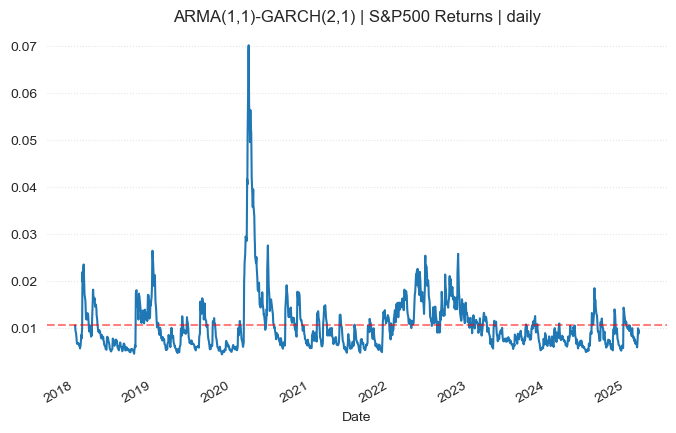

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
result2.conditional_volatility.plot(ax = ax)
plt.axhline(
    result2.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARMA(1,1)-GARCH(2,1) | S&P500 Returns | daily')
plt.show()

### 3. Fractional Integrated GARCH

#### 3-1. ARMA-FIGARCH

In [10]:
arma_figarch = arch.arch_model(
    a,
    vol = 'FIGARCH', 
    p = 1, 
    q = 1, 
    power = 0.5
).fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 21168409.429805614
Iteration:      2,   Func. Count:     23,   Neg. LLF: 44962086504.840225
Iteration:      3,   Func. Count:     39,   Neg. LLF: 10726.105928006844
Iteration:      4,   Func. Count:     49,   Neg. LLF: -1778.316058319624
Iteration:      5,   Func. Count:     56,   Neg. LLF: -3484.229348059157
Iteration:      6,   Func. Count:     63,   Neg. LLF: -4550.287482959167
Iteration:      7,   Func. Count:     70,   Neg. LLF: -4578.787252720602
Iteration:      8,   Func. Count:     77,   Neg. LLF: -4308.266207884076
Iteration:      9,   Func. Count:     84,   Neg. LLF: -5746.022504285487
Iteration:     10,   Func. Count:     90,   Neg. LLF: -5678.899559665665
Iteration:     11,   Func. Count:     97,   Neg. LLF: -5744.998254009846
Iteration:     12,   Func. Count:    104,   Neg. LLF: -5748.371604881635
Iteration:     13,   Func. Count:    110,   Neg. LLF: -5105.892478770689
Iteration:     14,   Func. Count:    117,   Neg. LL

In [11]:
print(arma_figarch.summary())

               Constant Mean - Power FIGARCH (power: 0.5) Model Results               
Dep. Variable:                           None   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:         Power FIGARCH (power: 0.5)   Log-Likelihood:                5753.22
Distribution:                          Normal   AIC:                          -11496.4
Method:                    Maximum Likelihood   BIC:                          -11469.0
                                                No. Observations:                 1799
Date:                        Sun, Mar 02 2025   Df Residuals:                     1798
Time:                                02:50:03   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------------------------------------------

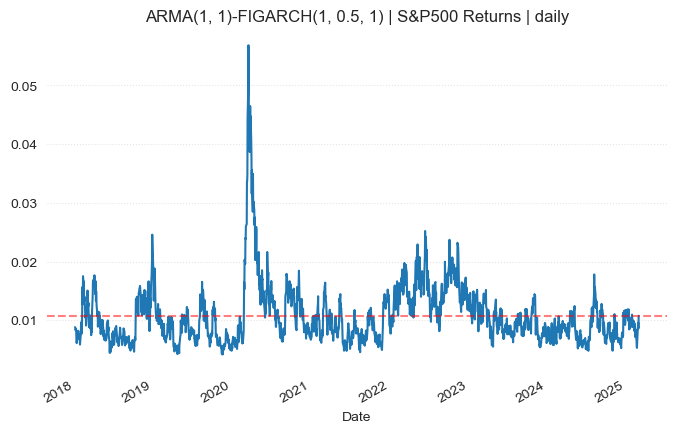

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
arma_figarch.conditional_volatility.plot(ax = ax)
plt.axhline(
    arma_figarch.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARMA(1, 1)-FIGARCH(1, 0.5, 1) | S&P500 Returns | daily')
plt.show()

#### 3-2. ARFIMA-FIGARCH

In [13]:
from FinancialMachineLearning.statsmodels_extension.arfima import ARFIMA

arfima = ARFIMA(data['Close'], order = (8, 0.7, 7)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57246D+02    |proj g|=  1.06884D+03


 This problem is unconstrained.



At iterate    5    f=  5.31142D+00    |proj g|=  1.88189D-01

At iterate   10    f=  5.26482D+00    |proj g|=  5.73162D-02

At iterate   15    f=  5.25103D+00    |proj g|=  1.88270D-02

At iterate   20    f=  5.25038D+00    |proj g|=  3.78042D-03

At iterate   25    f=  5.25011D+00    |proj g|=  9.38577D-03

At iterate   30    f=  5.24972D+00    |proj g|=  7.70587D-03

At iterate   35    f=  5.24947D+00    |proj g|=  3.92393D-02

At iterate   40    f=  5.24903D+00    |proj g|=  3.46290D-02

At iterate   45    f=  5.24869D+00    |proj g|=  2.47404D-02

At iterate   50    f=  5.24844D+00    |proj g|=  6.12742D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [14]:
print(arfima.summary())

                           ARFIMA Results
Dep. Variable:   predicted               No. Observations: 1429     
Model:           ARFIMA(8, 0.7, 7)       Log Likelihood    -7500.028
Date:            Sun, 02 Mar 2025        AIC               15032.056
Time:            02:50:12                BIC               15116.291
Covariance Type: opg                     HQIC              15063.513
Sample:          06-25-2019 - 02-28-2025                            
---------------------------------------------------------------------
               coef    std err     t     P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
ar.L1         -1.7130   0.1992  -8.5976  0.0000    -2.1035    -1.3225
ar.L2         -1.4391   0.2969  -4.8473  0.0000    -2.0210    -0.8572
ar.L3         -0.7958   0.1924  -4.1358  0.0000    -1.1729    -0.4187
ar.L4          0.1143   0.0456   2.5077  0.0122     0.0250     0.2036
ar.L5          1.0587   0.0418  25.3554  0.0000     0.

In [15]:
a = arfima.resid.iloc[1:]

In [16]:
arfima_figarch = arch.arch_model(
    a,
    vol = 'FIGARCH',
    p = 1,
    q = 1,
    power = 0.5
).fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 12853.47579046436
Iteration:      2,   Func. Count:     18,   Neg. LLF: 12848.733541140584
Iteration:      3,   Func. Count:     25,   Neg. LLF: 8290.771608284278
Iteration:      4,   Func. Count:     32,   Neg. LLF: 8073.412874225618
Iteration:      5,   Func. Count:     39,   Neg. LLF: 9715.473496297222
Iteration:      6,   Func. Count:     47,   Neg. LLF: 7335.729757867019
Iteration:      7,   Func. Count:     53,   Neg. LLF: 7877.082810123538
Iteration:      8,   Func. Count:     60,   Neg. LLF: 7333.655753426698
Iteration:      9,   Func. Count:     66,   Neg. LLF: 7332.394335206814
Iteration:     10,   Func. Count:     72,   Neg. LLF: 7331.568503816658
Iteration:     11,   Func. Count:     78,   Neg. LLF: 7330.5935901098155
Iteration:     12,   Func. Count:     84,   Neg. LLF: 7330.281847069988
Iteration:     13,   Func. Count:     90,   Neg. LLF: 7333.960641541891
Iteration:     14,   Func. Count:     97,   Neg. LLF: 7329.855

In [17]:
print(arfima_figarch.summary())

               Constant Mean - Power FIGARCH (power: 0.5) Model Results               
Dep. Variable:                           None   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:         Power FIGARCH (power: 0.5)   Log-Likelihood:               -7329.51
Distribution:                          Normal   AIC:                           14669.0
Method:                    Maximum Likelihood   BIC:                           14695.3
                                                No. Observations:                 1428
Date:                        Sun, Mar 02 2025   Df Residuals:                     1427
Time:                                02:50:14   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------------------------------------------

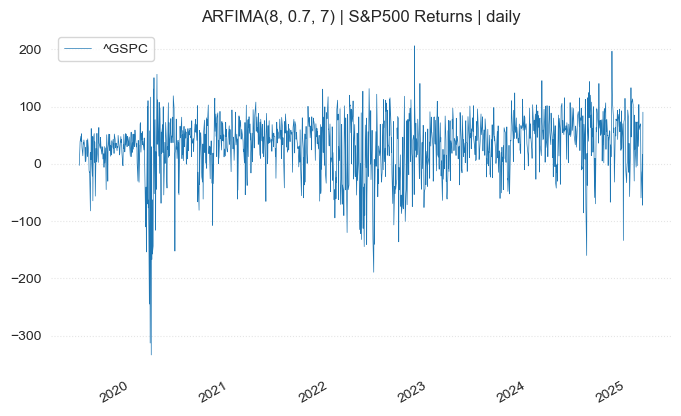

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
arfima.fittedvalues.plot(ax = ax, lw = 0.5)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARFIMA(8, 0.7, 7) | S&P500 Returns | daily')
plt.show()

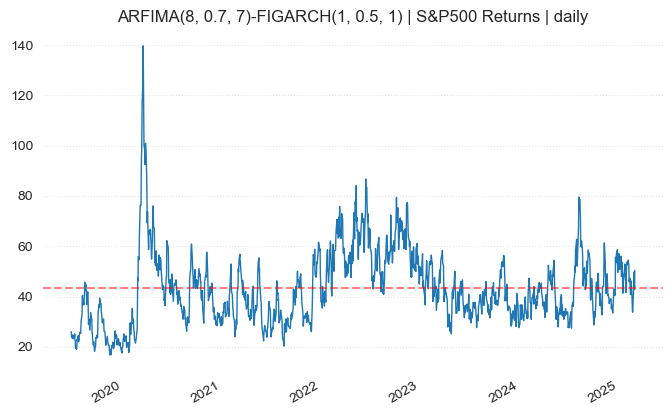

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
arfima_figarch.conditional_volatility.plot(ax = ax, lw = 1)
plt.axhline(
    arfima_figarch.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARFIMA(8, 0.7, 7)-FIGARCH(1, 0.5, 1) | S&P500 Returns | daily')
plt.show()